# Introduction 

### Fraud Detection Dataset

Source:Kaggle.com

https://www.kaggle.com/datasets/umuttuygurr/e-commerce-fraud-detection-dataset?resource=download

This dataset contains realistic synthetic financial transaction records designed for a binary fraud-detection machine learning project. Each row represents a single transaction performed by a user, combined with historical behavioral features (e.g., user age on the platform, average past spending) and transaction-level attributes such as payment method, geo-distance, authentication flags and merchant category.

The dataset is structured to mimic modern fraud-detection signals used by financial institutions and payment processors. It includes both user-level features, transaction-level metadata, and risk-related verification tags (CVV result, AVS match, 3D-Secure flag).

The target variable is is_fraud, indicating whether the transaction is fraudulent (1) or legitimate (0). This dataset is excellent for building classification models such as Logistic Regression, Random Forest, XGBoost, or Neural Networks for fraud prediction.

| **Column Name**             | **Meaning / Description**                                                                                          |
| --------------------------- | ------------------------------------------------------------------------------------------------------------------ |
| **transaction_id**          | Unique ID automatically assigned to each transaction. Helps identify each record.                                  |
| **user_id**                 | Unique identifier for the customer performing the transaction.                                                     |
| **account_age_days**        | Number of days since the user created their account on the platform. Older accounts usually mean lower fraud risk. |
| **total_transactions_user** | Total number of past transactions completed by the user. Used to track user activity patterns.                     |
| **avg_amount_user**         | Average amount (₦ or $) spent by the user across previous transactions. Helps detect unusual spikes.               |
| **amount**                  | The monetary value of the current transaction. High or abnormal values may be fraud indicators.                    |
| **country**                 | Country where the transaction is taking place.                                                                     |
| **bin_country**             | Issuing country of the user’s card (based on the card BIN). Mismatches can be suspicious.                          |
| **channel**                 | Platform used for the transaction (e.g., web, mobile app, POS).                                                    |
| **merchant_category**       | Type of business where the transaction occurred (e.g., electronics, clothing, digital goods).                      |
| **promo_used**              | Whether the customer used a promo code or discount (1 = yes, 0 = no). Fraudsters sometimes abuse promos.           |
| **avs_match**               | Address Verification System match result (1 = matched, 0 = mismatch). Mismatches increase fraud risk.              |
| **cvv_result**              | Indicates whether the card CVV check was correct (match/mismatch).                                                 |
| **three_ds_flag**           | Whether 3D secure authentication was completed (1 = yes, 0 = no).                                                  |
| **transaction_time**        | Timestamp of the transaction. Can be used to extract hour, day of week, etc.                                       |
| **shipping_distance_km**    | Distance between billing address and shipping address in kilometers. Large distances may be red flags.             |
| **is_fraud**                | Target variable: 1 = fraudulent transaction, 0 = legitimate.                                                       |


In [1]:
#import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#read your data
df = pd.read_csv('transactions.csv')

In [3]:
df

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299690,299691,6000,996,45,27.93,34.07,ES,ES,web,grocery,0,1,1,0,2024-09-29T04:40:54Z,218.55,0
299691,299692,6000,996,45,27.93,68.56,ES,ES,app,travel,0,1,1,1,2024-10-03T08:49:02Z,185.55,0
299692,299693,6000,996,45,27.93,25.02,ES,ES,app,fashion,0,1,1,1,2024-10-26T07:40:38Z,33.50,0
299693,299694,6000,996,45,27.93,23.92,ES,ES,web,gaming,0,0,0,0,2024-10-27T09:31:56Z,71.75,0


#### Understanding the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299695 entries, 0 to 299694
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           299695 non-null  int64  
 1   user_id                  299695 non-null  int64  
 2   account_age_days         299695 non-null  int64  
 3   total_transactions_user  299695 non-null  int64  
 4   avg_amount_user          299695 non-null  float64
 5   amount                   299695 non-null  float64
 6   country                  299695 non-null  object 
 7   bin_country              299695 non-null  object 
 8   channel                  299695 non-null  object 
 9   merchant_category        299695 non-null  object 
 10  promo_used               299695 non-null  int64  
 11  avs_match                299695 non-null  int64  
 12  cvv_result               299695 non-null  int64  
 13  three_ds_flag            299695 non-null  int64  
 14  tran

In [5]:
df.shape

(299695, 17)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,299695.0,149848.000000,86514.638800,1.00,74924.50,149848.00,224771.50,299695.00
user_id,299695.0,3002.559432,1732.309663,1.00,1501.00,3007.00,4504.00,6000.00
account_age_days,299695.0,973.397871,525.241409,1.00,516.00,975.00,1425.00,1890.00
total_transactions_user,299695.0,50.673321,5.976391,40.00,46.00,51.00,56.00,60.00
avg_amount_user,299695.0,148.142973,200.364624,3.52,46.19,90.13,173.45,4565.29
amount,299695.0,177.165279,306.926507,1.00,42.10,89.99,191.11,16994.74
promo_used,299695.0,0.153640,0.360603,0.00,0.00,0.00,0.00,1.00
avs_match,299695.0,0.837999,0.368453,0.00,1.00,1.00,1.00,1.00
cvv_result,299695.0,0.872110,0.333968,0.00,1.00,1.00,1.00,1.00
three_ds_flag,299695.0,0.784588,0.411109,0.00,1.00,1.00,1.00,1.00


In [7]:
df.isnull().sum()

transaction_id             0
user_id                    0
account_age_days           0
total_transactions_user    0
avg_amount_user            0
amount                     0
country                    0
bin_country                0
channel                    0
merchant_category          0
promo_used                 0
avs_match                  0
cvv_result                 0
three_ds_flag              0
transaction_time           0
shipping_distance_km       0
is_fraud                   0
dtype: int64

In [8]:
df['is_fraud'].value_counts()

is_fraud
0    293083
1      6612
Name: count, dtype: int64

In [9]:
df['merchant_category'].value_counts()

merchant_category
electronics    60220
travel         59922
grocery        59913
gaming         59839
fashion        59801
Name: count, dtype: int64

In [10]:
df['channel'].value_counts(normalize=True)

channel
web    0.507936
app    0.492064
Name: proportion, dtype: float64

In [11]:
fraud_rate = df['is_fraud'].value_counts(normalize=True)
print(fraud_rate)

is_fraud
0    0.977938
1    0.022062
Name: proportion, dtype: float64


In [12]:
 df['country'].value_counts()

country
US    32430
GB    30602
FR    30343
NL    30220
TR    30074
PL    29965
RO    29501
DE    29060
ES    28885
IT    28615
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

##### 1. Which country pairs (country vs bin_country) are more suspicious

Our goal is to find country → BIN-country combinations with higher fraud rates.

In [13]:
# fraud rate by (country, bin_country)
pivot = (df
         .groupby(['country','bin_country'])
         .agg(total_transactions=('transaction_id','size'),
              frauds=('is_fraud','sum'))
         .reset_index())
pivot['fraud_rate'] = pivot['frauds'] / pivot['total_transactions']

In [14]:
# filter combinations with enough samples
pivot_filtered = pivot[pivot['total_transactions'] >= 30].sort_values('fraud_rate', ascending=False)
pivot_filtered.head(20)   # top suspicious pairs

,country,bin_country,total_transactions,frauds,fraud_rate
84,TR,IT,294,52,0.176871
29,FR,US,282,48,0.170213
82,TR,FR,235,38,0.161702
71,RO,ES,268,43,0.160448
85,TR,NL,274,43,0.156934
78,RO,TR,258,38,0.147287
18,ES,TR,247,36,0.145749
53,NL,GB,275,40,0.145455
86,TR,PL,262,38,0.145038
63,PL,GB,259,37,0.142857


- Cross-border transactions often fail security checks

- Fraudsters usually route payments through other countries

##### 2. Do web vs app transactions behave differently?

Our goal is to compare channels (channel) for fraud frequency and transaction characteristics.

In [15]:
# fraud rate by channel
channel_stats = (df.groupby('channel')
                   .agg(total=('transaction_id','size'),
                        frauds=('is_fraud','sum'),
                        mean_amount=('amount','mean'),
                        median_shipping=('shipping_distance_km','median'))
                   .reset_index())
channel_stats['fraud_rate'] = channel_stats['frauds'] / channel_stats['total']
channel_stats.sort_values('fraud_rate', ascending=False)

,channel,total,frauds,mean_amount,median_shipping,fraud_rate
1,web,152226,5426,182.670108,274.93,0.035644
0,app,147469,1186,171.482876,271.04,0.008042


Fraud rate on the web is over 4× higher than the app.

Possible explanations:

Apps often require biometric login (more secure)

Web sessions are easier to forge with stolen credentials

Fraudsters avoid device fingerprinting (common in apps)

##### 3. Are unusual merchant categories associated with higher fraud?

our goal is to identify merchant_category with elevated fraud.

In [16]:
mc = (df.groupby('merchant_category')
       .agg(total=('transaction_id','size'),
            frauds=('is_fraud','sum'))
       .reset_index())
mc['fraud_rate'] = mc['frauds'] / mc['total']
mc = mc[mc['total'] >= 20].sort_values('fraud_rate', ascending=False) # cutoff for stability
mc.head(15)

,merchant_category,total,frauds,fraud_rate
4,travel,59922,1388,0.023163
0,electronics,60220,1357,0.022534
1,fashion,59801,1340,0.022408
2,gaming,59839,1295,0.021641
3,grocery,59913,1232,0.020563


- Fraud rate is highest in travel and electronics.

- Fraudsters prefer categories where:

- Items have resale value (electronics)

- Services are consumed immediately (travel bookings → harder to reverse)

- Grocery and gaming show slightly lower risk, consistent with real-world patterns.

##### 4. Promo used → suspicious?

Our goal is to see if promo_used correlates with fraud.

In [17]:
promo = (df.groupby('promo_used')
           .agg(total=('transaction_id','size'),
                frauds=('is_fraud','sum'))
           .reset_index())
promo['fraud_rate'] = promo['frauds']/promo['total']
promo

,promo_used,total,frauds,fraud_rate
0,0,253650,4527,0.017847
1,1,46045,2085,0.045282


- Fraud rate more than doubles when promo codes are used.

- Possible reasons: Attackers test stolen cards using low-risk promo transactions.

- Fraudsters intentionally exploit promo discounts to maximize “profit.”

- Business meaning: Promo campaigns should include fraud checks, especially for new or unverified customers.

##### 5.Does Mismatched AVS or failed CVV equal high risk?

Our goal is to quantify fraud rate when avs_match == 0 or cvv_result == 0.

In [18]:
# AVS
avs = df.groupby('avs_match').agg(total=('transaction_id','size'), frauds=('is_fraud','sum')).reset_index()
avs['fraud_rate'] = avs['frauds']/avs['total']

# CVV
cvv = df.groupby('cvv_result').agg(total=('transaction_id','size'), frauds=('is_fraud','sum')).reset_index()
cvv['fraud_rate'] = cvv['frauds']/cvv['total']

avs, cvv

(   avs_match   total  frauds  fraud_rate
 0          0   48551    4693    0.096661
 1          1  251144    1919    0.007641,
    cvv_result   total  frauds  fraud_rate
 0           0   38328    4065    0.106058
 1           1  261367    2547    0.009745)

- Insight:

Transactions where the address verification fails (avs_match = 0) have over 12x higher fraud rate.
    
A failed CVV attempt is one of the strongest predictors,fraud rate jumps 10x when CVV does not validate.

- Business meaning:

Failed AVS should trigger strong warnings or mandatory re-verification.

Transactions with failed CVV should be blocked or undergo additional authentication.

## Feature Engineering & Preprocessing  

We now transform the dataset for modeling.


###### Encoding Categorical Features


In [19]:
categorical = ['country','bin_country','channel','merchant_category']
binary_cols = ['promo_used','avs_match','cvv_result','three_ds_flag']
numeric = ['amount','account_age_days','total_transactions_user',
           'avg_amount_user','shipping_distance_km']

In [20]:
# ColumnTransformer allows you to apply different preprocessing steps to different columns in one clean pipeline.
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical),
        ("num", StandardScaler(), numeric)
    ],
    remainder='passthrough'  # keep binary flags as they are
)

In [21]:
# DROP HIGH-CARDINALITY COLUMNS (columns with too many unique categories)
high_cardinality_cols = [col for col in df.columns if df[col].dtype == "object" and df[col].nunique() > 50]

df = df.drop(columns=high_cardinality_cols)

print("Dropped columns:", high_cardinality_cols)

# LABEL-ENCODE REMAINING CATEGORICALS
cat_cols = df.select_dtypes(include="object").columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

Dropped columns: ['transaction_time']


Dropping high cardinality columns: This step was crucial because without it,the feature space blew up, slow down training, cause memory and value errors, increase overfitting and didn’t help with the  prediction.

In [22]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns

The above code Helps us separate numeric columns, So we can scale them properly and apply the right preprocessing, without breaking the model or causing errors

##### New Feature Creation

In [23]:
# Creating new features from existing ones to uncover more predictive power
df['amount_to_avg_ratio'] = df['amount'] / df['avg_amount_user']
df['cross_country_flag'] = (df['country'] != df['bin_country']).astype(int)
df.head()

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,shipping_distance_km,is_fraud,amount_to_avg_ratio,cross_country_flag
0,1,1,141,47,147.93,84.75,2,2,1,4,0,1,1,1,370.95,0,0.572906,0
1,2,1,141,47,147.93,107.90,2,2,1,4,0,0,0,0,149.62,0,0.729399,0
2,3,1,141,47,147.93,92.36,2,2,0,4,1,1,1,1,164.08,0,0.624349,0
3,4,1,141,47,147.93,112.47,2,2,1,1,0,1,1,1,397.40,0,0.760292,0
4,5,1,141,47,147.93,132.91,2,9,1,0,0,1,1,1,935.28,0,0.898465,1


In [24]:
# Add these new features to the numeric/binary feature lists
numeric.append('amount_to_avg_ratio')
binary_cols.append('cross_country_flag')

### Model Building & Evaluation

In [25]:
# Seperate features from target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [26]:
#Split data into training and testing set
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Logistic Regression

What this does is: It looks at features and learns the patterns that lead to a YES or NO.

Then it gives you a probability between 0 and 1:

0 → definitely NO, 1 → definitely YES

If the probability is more than 0.5, it predicts YES. Otherwise, NO.

In [27]:
# Train Logistics Regression
log_reg = LogisticRegression(
    solver='liblinear',   # more stable for small/medium datasets
    max_iter=5000,        # increase iterations
    class_weight='balanced'   # handles imbalance
)
#fit data
log_reg.fit(X_train, y_train)

# EVALUATION
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     58640
           1       0.15      0.86      0.26      1299

    accuracy                           0.89     59939
   macro avg       0.57      0.88      0.60     59939
weighted avg       0.98      0.89      0.93     59939



The model performs excellent on the majority class (0).

The model performs poorly on the minority class (1) in terms of precision.

This situation is common in imbalanced datasets.

### Random forest Classification
Random Forest is more like a smart voting system made up of many simple trees that work together to make more accurate and reliable predictions than any single tree could. This model is more accurate and stable. it also prevent the model from memorizing data.

In [28]:
# Train Random Forest (no scaling needed)
rf = RandomForestClassifier(n_estimators=300,      # more trees = more stable
    max_depth=None, class_weight='balanced',  # FIX imbalance
    random_state=42, n_jobs=-1
)

#fit in the data
rf.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)

# Evaluation
print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, rf_pred))


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     58640
           1       0.96      0.75      0.84      1299

    accuracy                           0.99     59939
   macro avg       0.98      0.87      0.92     59939
weighted avg       0.99      0.99      0.99     59939

Confusion Matrix:

[[58595    45]
 [  326   973]]


- It predicted normal transactions (Class 0) almost perfectly

Precision = 0.99

Recall = 1.00

It caught almost every legitimate transaction correctly.

- It performed very strong on fraud (Class 1)

Precision = 0.96
When it said “this is fraud,” it was correct 96% of the time.

Recall = 0.75
It successfully caught 75% of all fraud attempts.

- Overall Accuracy = 0.99

Meaning 99% of all transactions were classified correctly.

- Confusion Matrix

Only 45 legit transactions flagged wrongly

It caught 973 fraudulent transactions

It missed 326 frauds 

#### XGBoost 

XGBoost as a very smart committee of smaller trees that work together to detect fraud by learning patterns, signals, and subtle red flags in this dataset.

In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier( n_estimators=300, learning_rate=0.1, max_depth=6,
    subsample=0.8,colsample_bytree=0.8,scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train),  # imbalance fix
    random_state=42, n_jobs=-1
)

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print("XGBoost Classification Report:\n")
print(classification_report(y_test, xgb_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, xgb_pred))


XGBoost Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     58640
           1       0.53      0.87      0.66      1299

    accuracy                           0.98     59939
   macro avg       0.76      0.93      0.82     59939
weighted avg       0.99      0.98      0.98     59939

Confusion Matrix:

[[57629  1011]
 [  167  1132]]


With the above result, it can be seen that XGBoost focuses more on the minority because this dataset is highly imbalanced: 58,640 normal transactions vs only ~1,300 fraud cases. Because fraud is rare, most models ignore them.
But XGBoost automatically:

- Detects misclassified fraud transactions

- Gives them higher weight

- Forces new trees to focus on fraud patterns.

Which lead  to High recall for fraud (0.87). It captures most fraud cases.

Lower precision for fraud (0.53). It sometimes raises false alarms while trying to catch more fraud.

### Feature Importance

- Checking feature importance to understand what influences the prediction the most

In [30]:
# Get feature names from your encoded + scaled X_train
feature_names = X_train.columns

# Get importance values
importances = rf.feature_importances_

# Create a dataframe for easy viewing
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 20
rf_importance_df.head(10)

,Feature,Importance
14,shipping_distance_km,0.210414
2,account_age_days,0.186700
11,avs_match,0.128218
15,amount_to_avg_ratio,0.096835
5,amount,0.084805
12,cvv_result,0.066841
13,three_ds_flag,0.046813
16,cross_country_flag,0.033001
8,channel,0.026791
4,avg_amount_user,0.024646


<Figure size 1000x800 with 0 Axes>

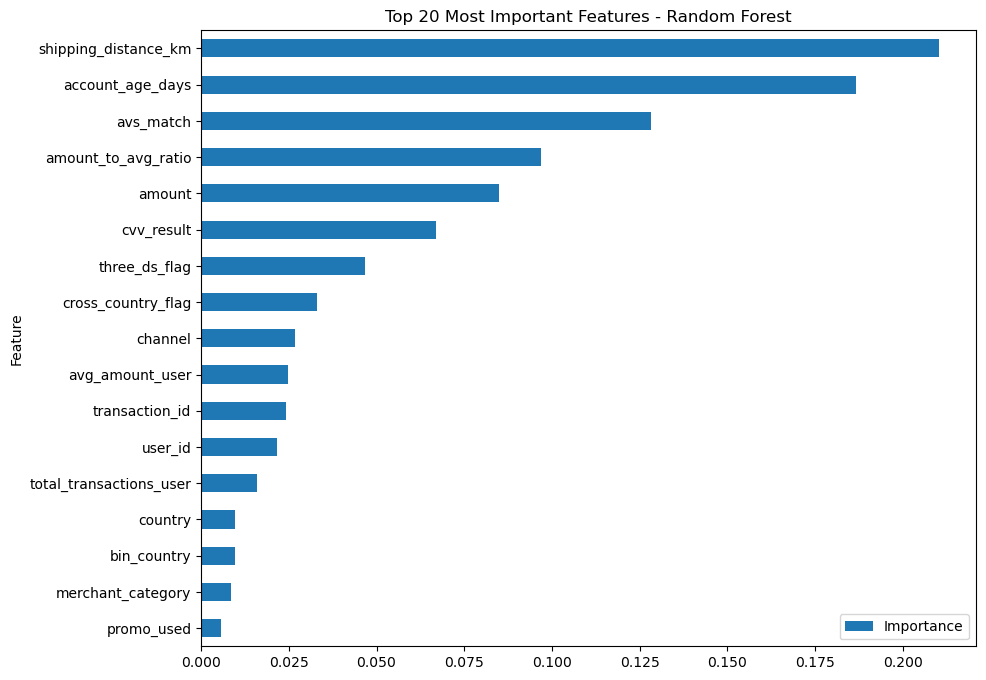

In [32]:
plt.figure(figsize=(10,8))
rf_importance_df.head(20).plot(
    x='Feature', 
    y='Importance', 
    kind='barh', 
    figsize=(10,8)
)
plt.title("Top 20 Most Important Features - Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [31]:
# Get the booster from your trained model
booster = xgb.get_booster()

# Extract feature importance
xgb_importance = booster.get_score(importance_type='gain')

# Convert to DataFrame
xgb_importance_df = pd.DataFrame({
    'Feature': list(xgb_importance.keys()),
    'Importance': list(xgb_importance.values())
}).sort_values(by='Importance', ascending=False)

# Display top 10 important features
xgb_importance_df.head(10)


,Feature,Importance
11,avs_match,1013.792725
2,account_age_days,373.791809
14,shipping_distance_km,347.599945
16,cross_country_flag,268.525238
12,cvv_result,246.551865
8,channel,217.001862
13,three_ds_flag,166.059265
5,amount,150.711197
15,amount_to_avg_ratio,134.696838
1,user_id,59.253262


<Figure size 1000x800 with 0 Axes>

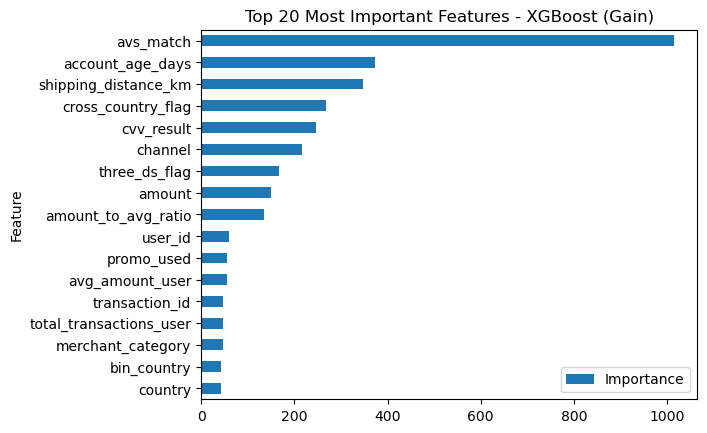

In [33]:
plt.figure(figsize=(10,8))
xgb_importance_df.head(20).plot(
    x='Feature',
    y='Importance',
    kind='barh'
)
plt.title("Top 20 Most Important Features - XGBoost (Gain)")
plt.gca().invert_yaxis()
plt.show()